In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

sns.set_style('darkgrid')

In [2]:
# importing data
df = pd.read_csv('csv_files/new_kc_house_data_clean_with_dummies2.csv')
df = df.drop(['Unnamed: 0','id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21420 non-null  float64
 1   bedrooms         21420 non-null  int64  
 2   bathrooms        21420 non-null  float64
 3   sqft_living      21420 non-null  int64  
 4   sqft_lot         21420 non-null  int64  
 5   sqft_above       21420 non-null  int64  
 6   yr_built         21420 non-null  int64  
 7   zipcode          21420 non-null  int64  
 8   lat              21420 non-null  float64
 9   long             21420 non-null  float64
 10  sqft_living15    21420 non-null  int64  
 11  sqft_lot15       21420 non-null  int64  
 12  waterfront_N     21420 non-null  float64
 13  waterfront_Y     21420 non-null  float64
 14  not_renovated    21420 non-null  float64
 15  is_renovated     21420 non-null  float64
 16  floors_1         21420 non-null  float64
 17  floors_2    

In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1791.170215,71.092997,35.124416,47.560197,-122.213784,...,0.004715,0.191036,0.316200,0.272969,0.219795,0.001307,0.007563,0.648926,0.263445,0.078758
std,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,828.692965,29.387141,19.236257,0.138589,0.140791,...,0.068507,0.393127,0.465003,0.445496,0.414117,0.036132,0.086638,0.477317,0.440512,0.269367
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,0.000000,0.000000,47.155900,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1200.000000,52.000000,21.000000,47.471200,-122.328000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1560.000000,75.000000,34.000000,47.572100,-122.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2220.000000,97.000000,51.000000,47.678100,-122.125000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,115.000000,69.000000,47.777600,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


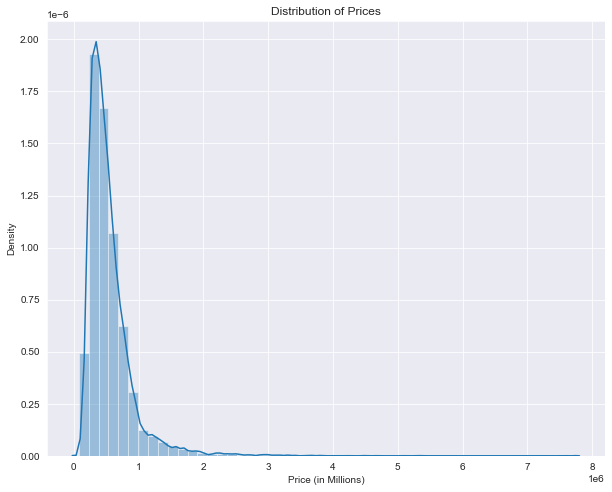

In [4]:
# checking normality of 'price'
fig = plt.figure(figsize=(10, 8))
sns.distplot(df['price'])
plt.title('Distribution of Prices')
plt.xlabel('Price (in Millions)')
plt.ylabel('Density')
plt.show();


Target variable is heavily skewed. Explore relationship of homes above $2 million 

In [5]:
above_2mil = df[df['price'] > 2000000]
above_2mil.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
count,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.000000,198.000000,198.000000,198.000000
mean,2.776364e+06,4.358586,3.862374,5054.338384,22761.297980,4027.388889,71.510101,29.444444,47.620033,-122.240929,...,0.227273,0.181818,0.338384,0.272727,0.207071,0.0,0.005051,0.611111,0.232323,0.151515
std,8.444762e+05,0.986046,1.092922,1564.112305,40021.220413,1320.755766,35.510739,20.368545,0.049555,0.084339,...,0.420132,0.386672,0.474359,0.446491,0.406234,0.0,0.071067,0.488734,0.423385,0.359459
min,2.010000e+06,2.000000,1.750000,3000.000000,3452.000000,1830.000000,4.000000,3.000000,47.416900,-122.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.250000e+06,4.000000,3.250000,4082.500000,10044.250000,3117.500000,39.000000,7.000000,47.588800,-122.286750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,4.000000,3.750000,4695.000000,16031.500000,3805.000000,84.000000,25.000000,47.626350,-122.233000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
75%,3.000000e+06,5.000000,4.500000,5505.000000,22591.500000,4570.000000,102.750000,48.000000,47.639200,-122.210000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,7.700000e+06,8.000000,8.000000,13540.000000,453895.000000,9410.000000,114.000000,69.000000,47.761200,-121.982000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [6]:
def price_scatterplot(df, x_cols, y):
    for col in df[x_cols]:
        # checking normality of 'price'
        fig = plt.figure(figsize=(10, 8))
        sns.scatterplot(x=df[col], y=y)
        plt.title(f'{col.title()} : Prices')
        plt.xlabel(f'{col.title()}')
        plt.ylabel(f'Price (in Millions)')
        plt.show();

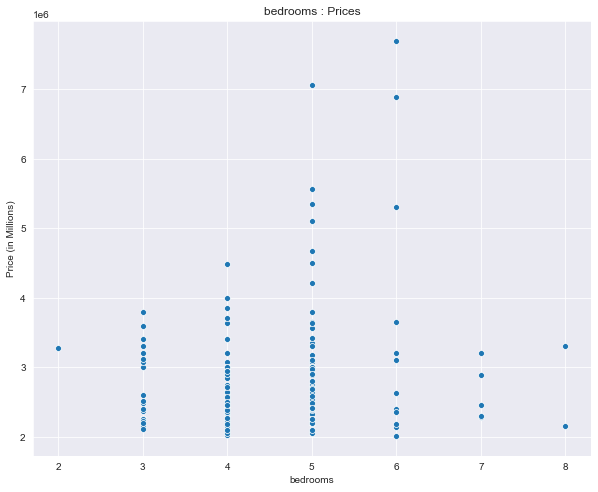

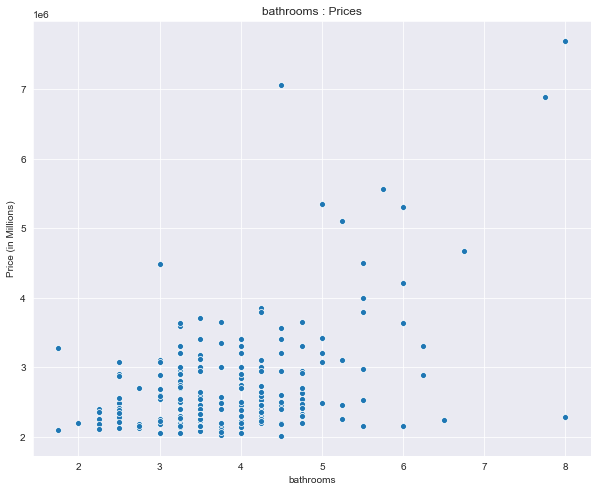

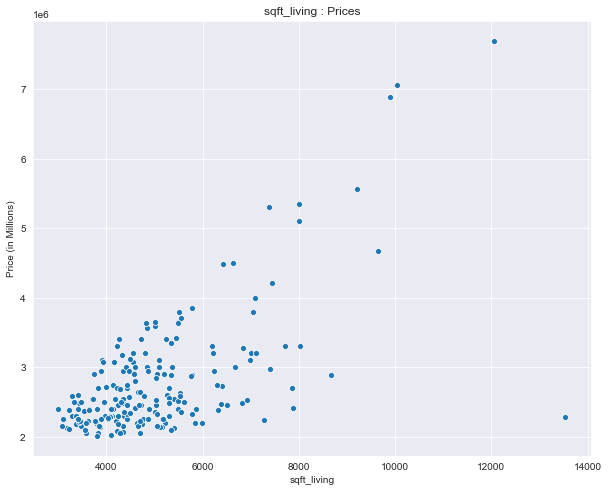

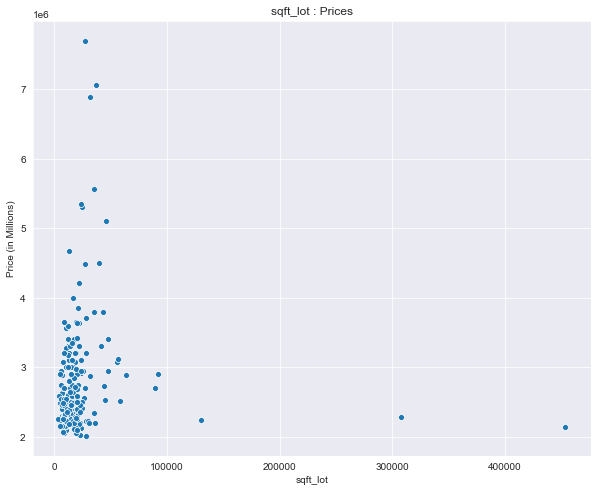

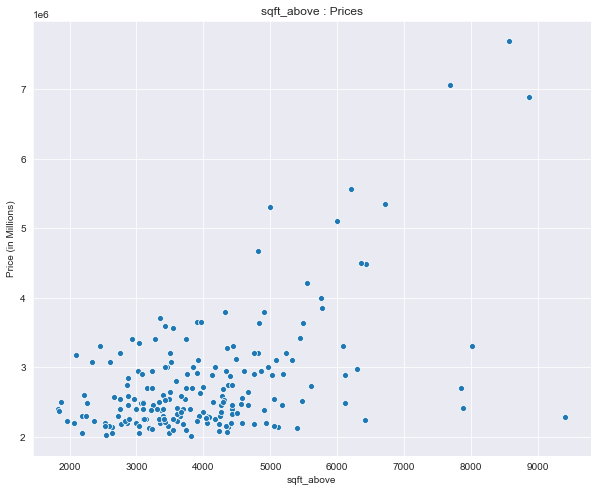

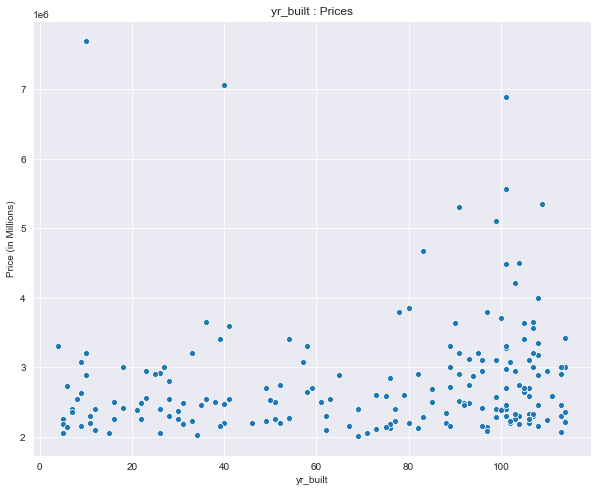

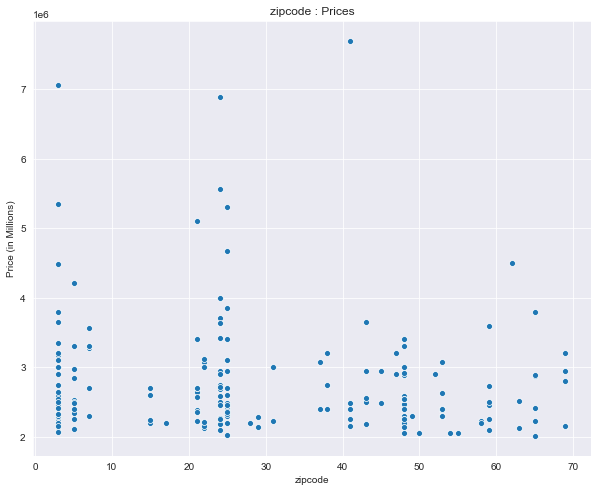

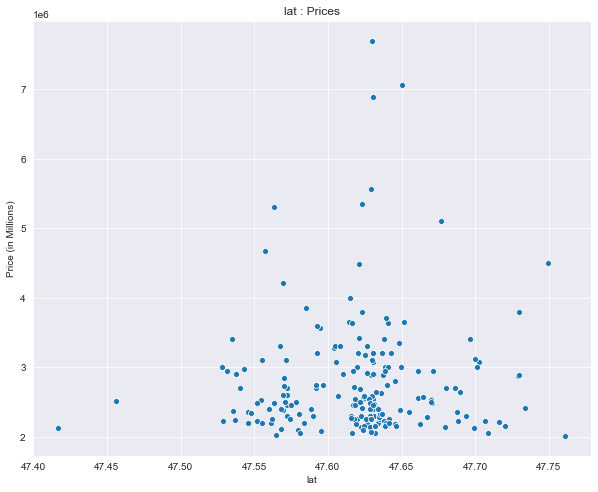

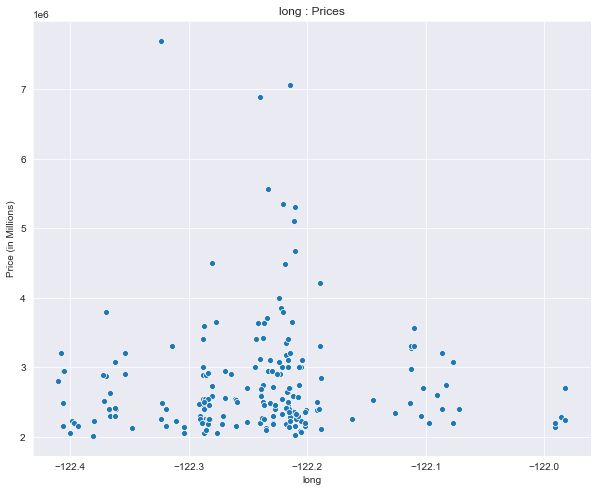

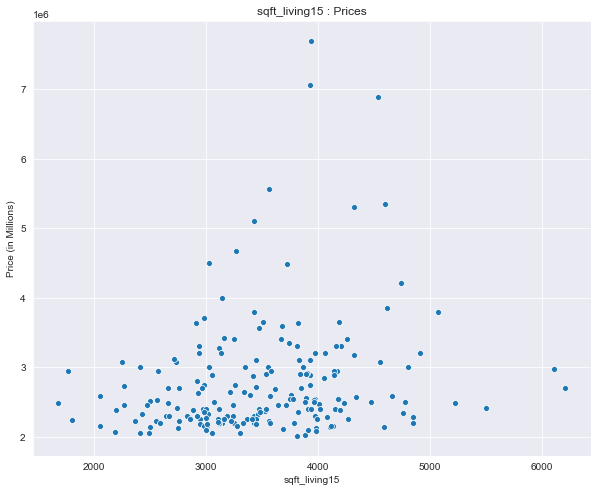

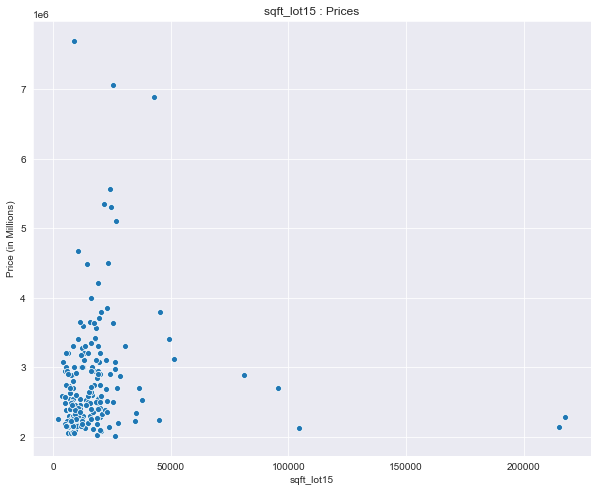

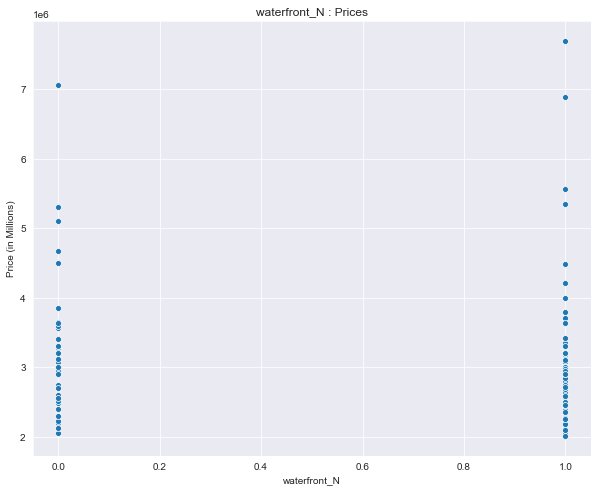

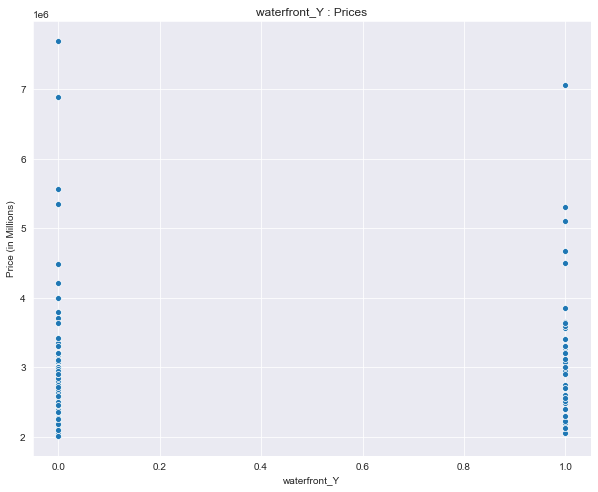

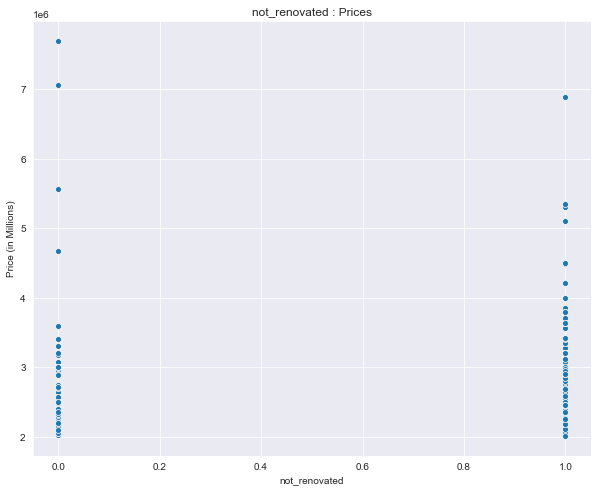

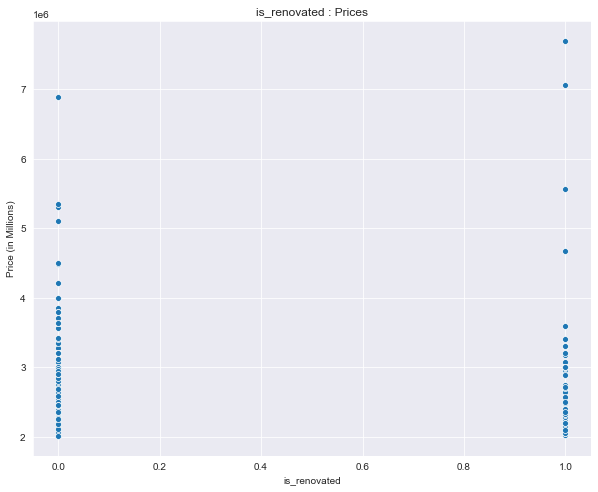

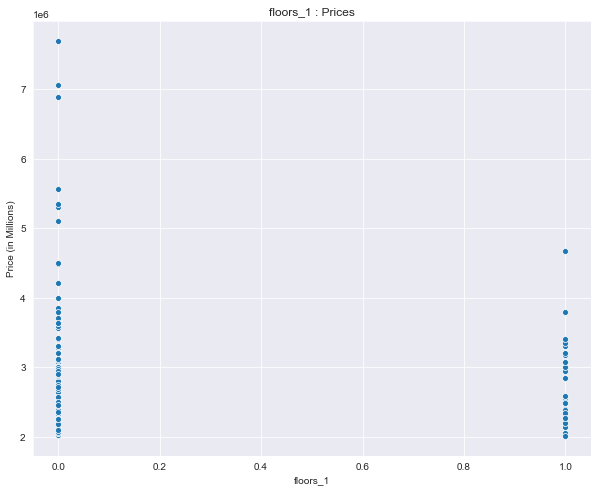

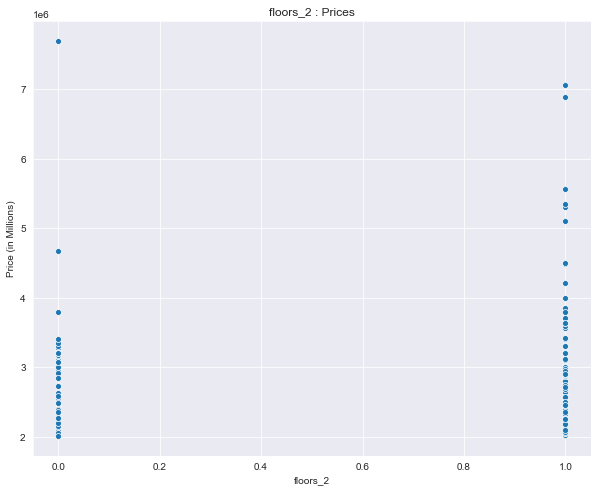

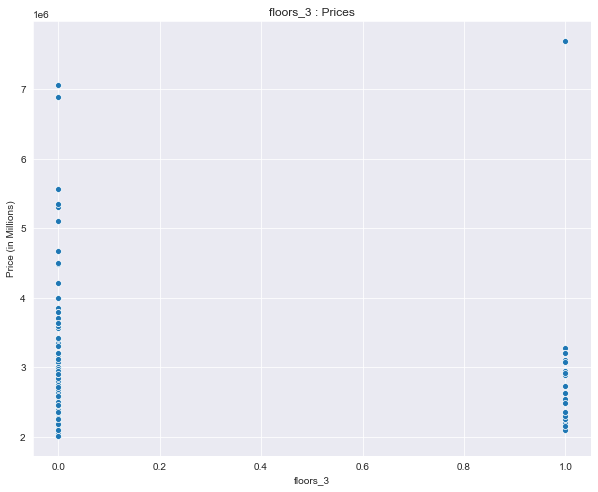

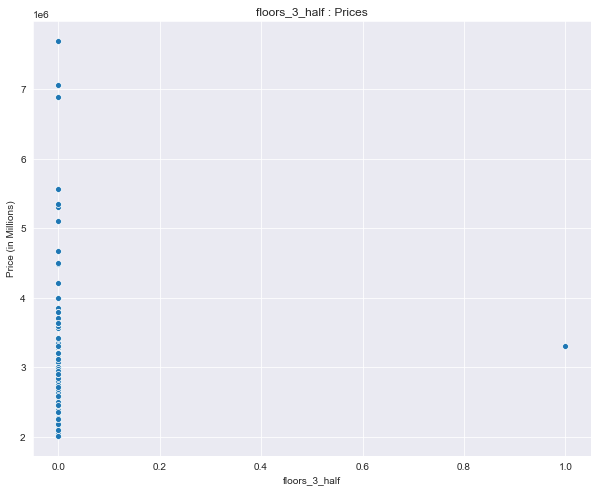

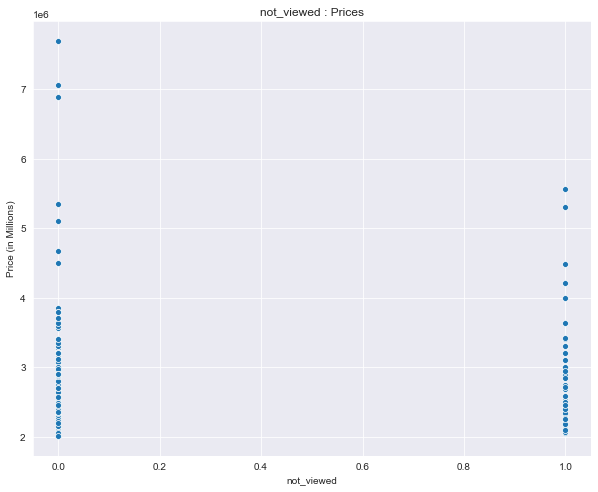

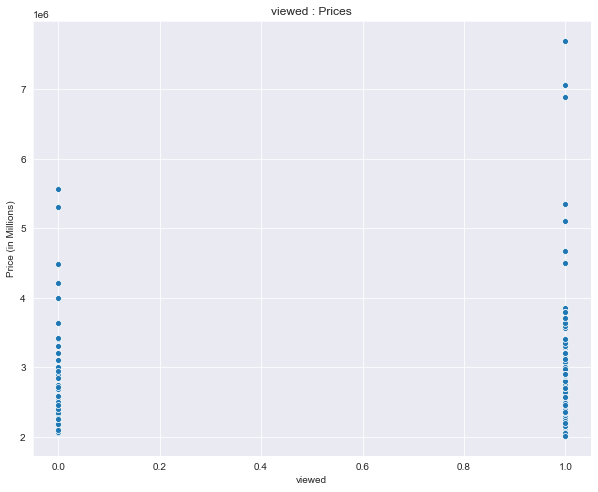

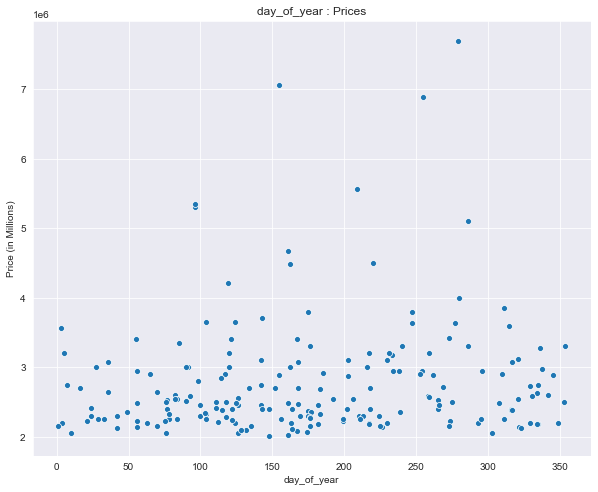

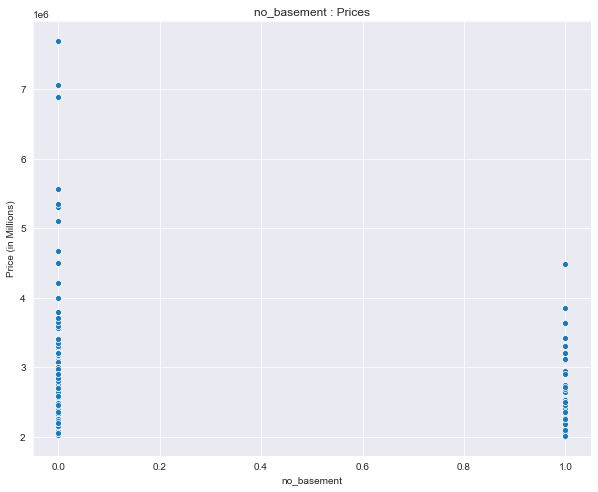

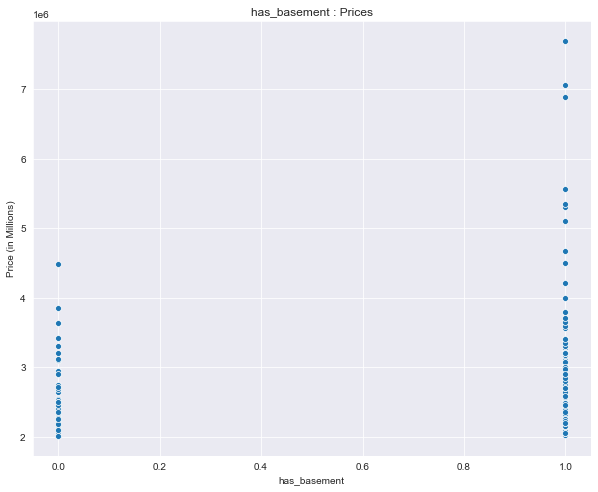

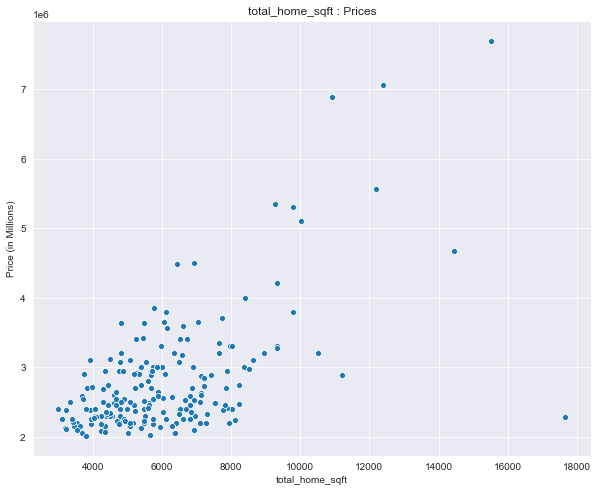

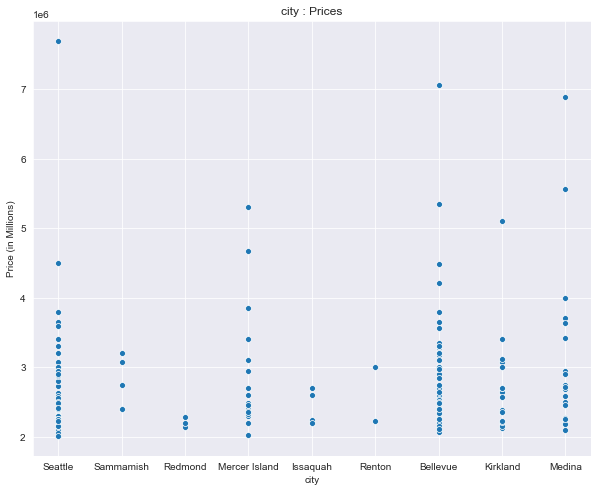

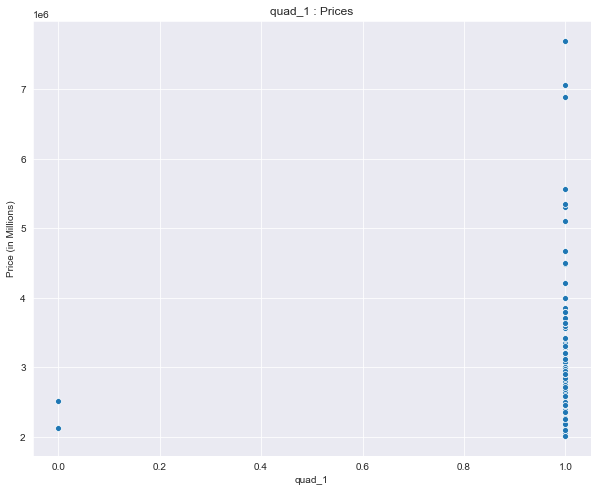

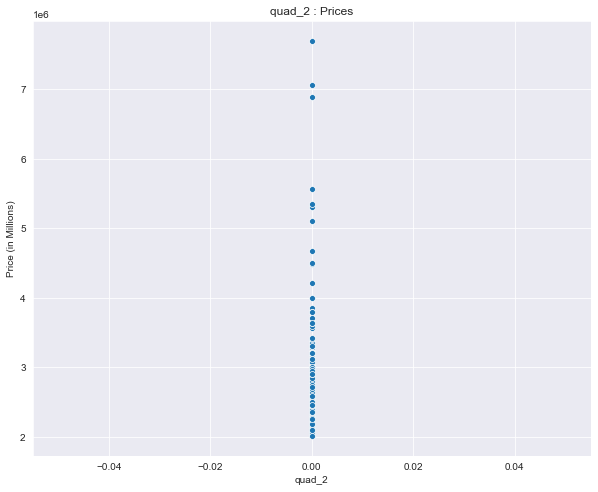

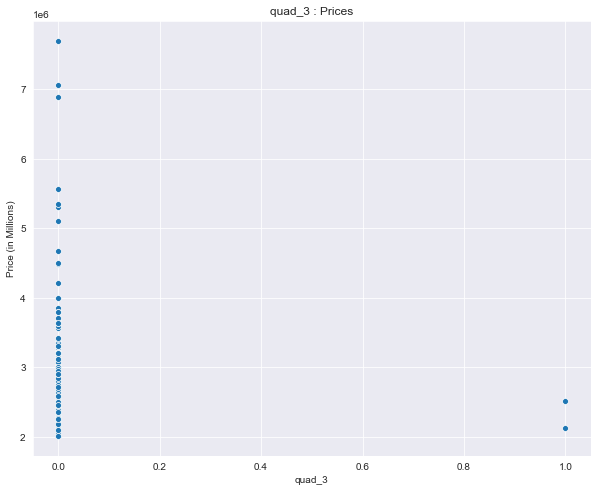

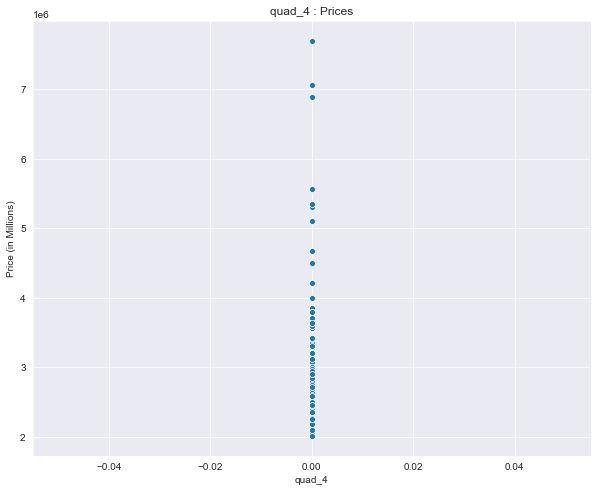

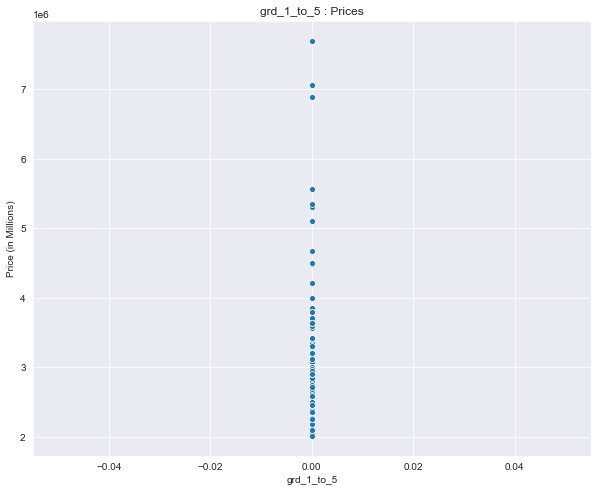

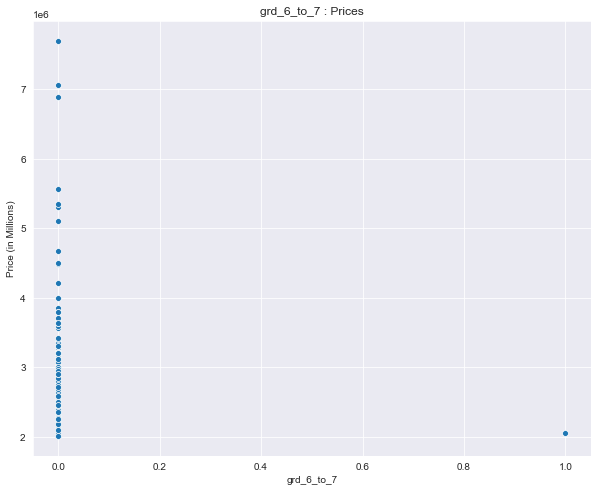

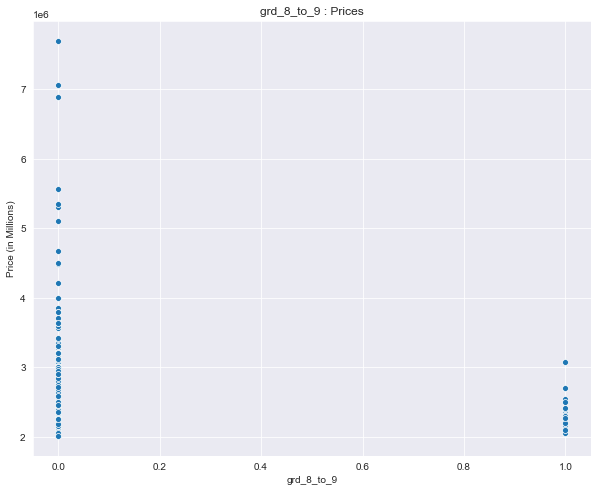

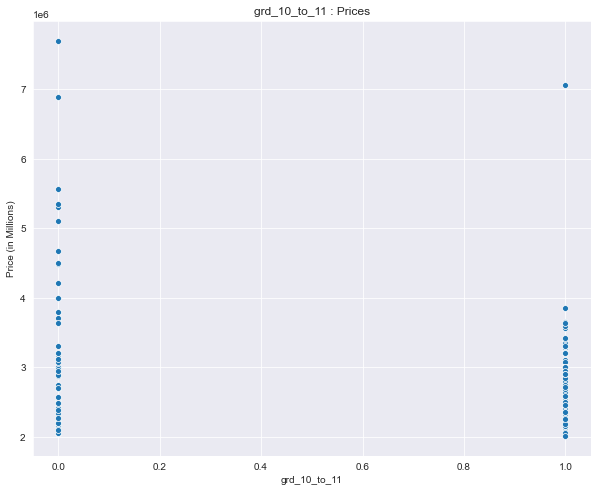

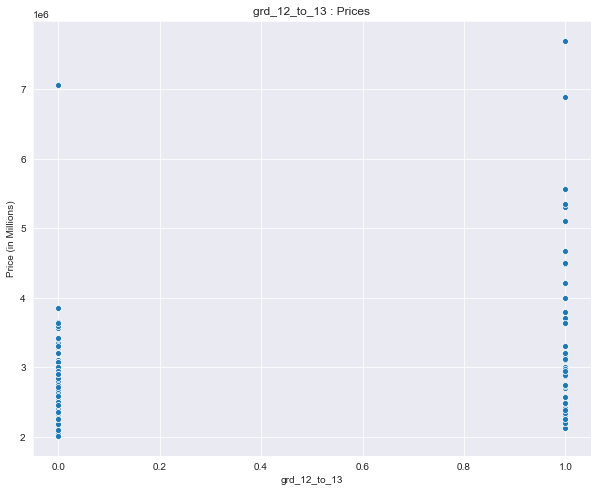

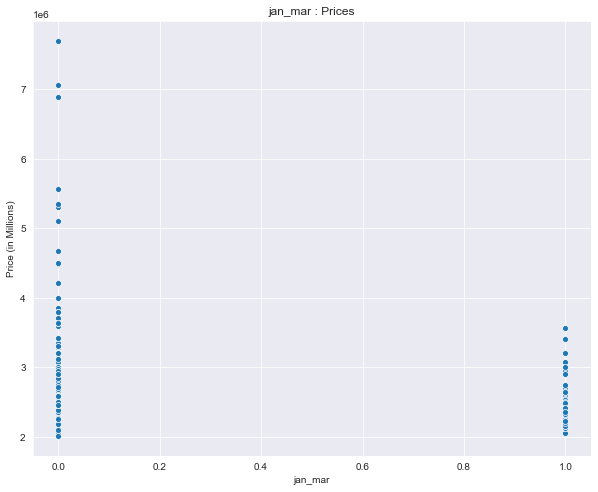

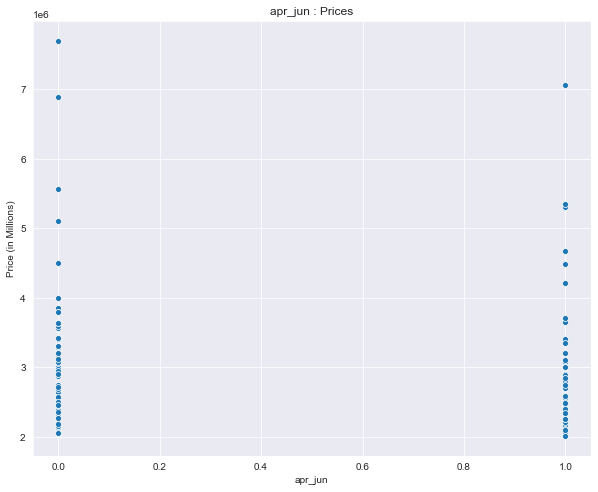

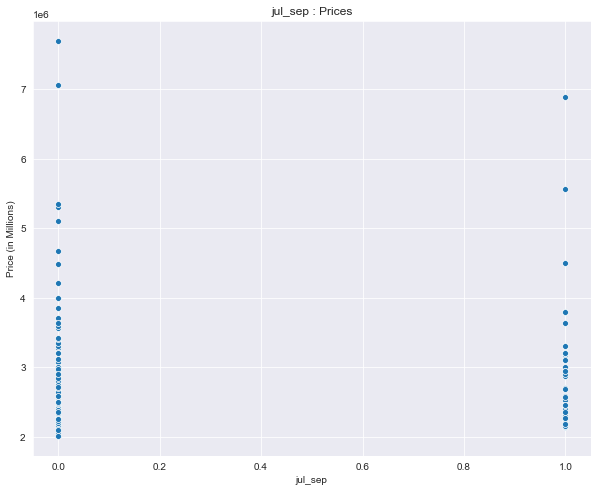

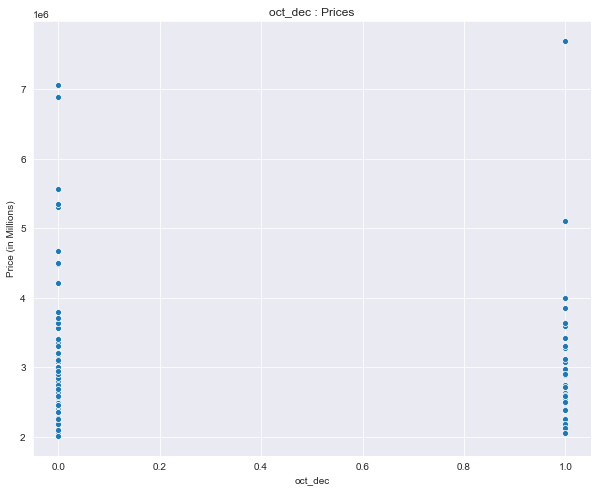

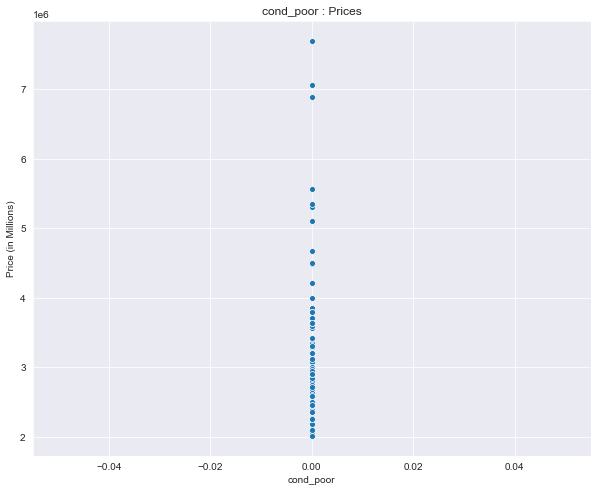

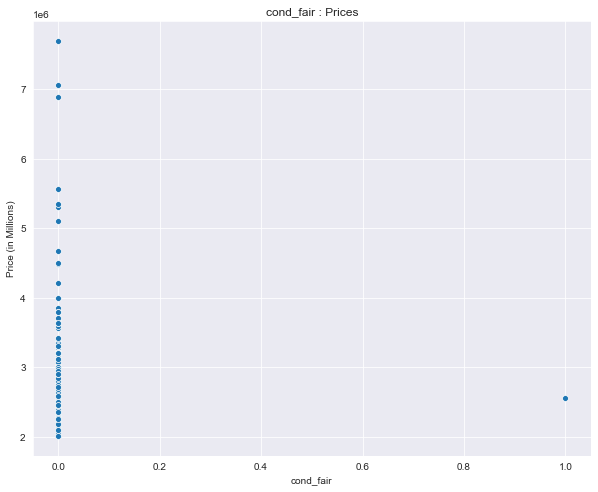

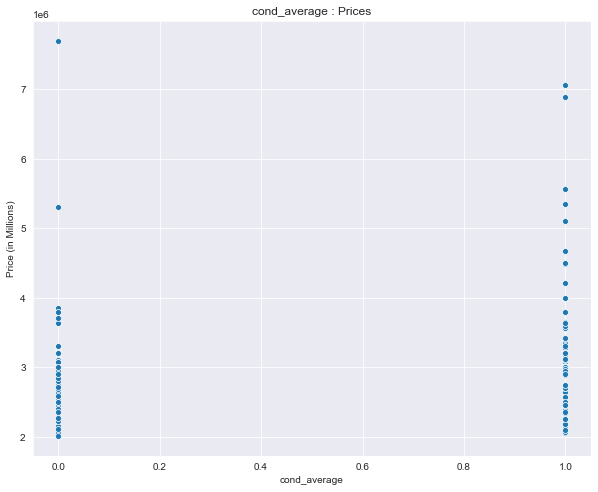

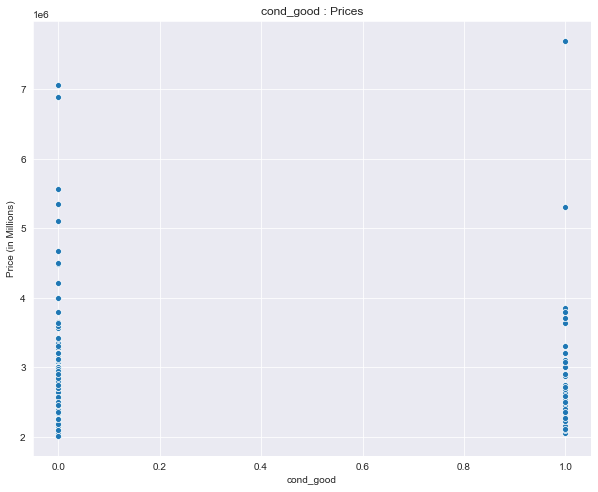

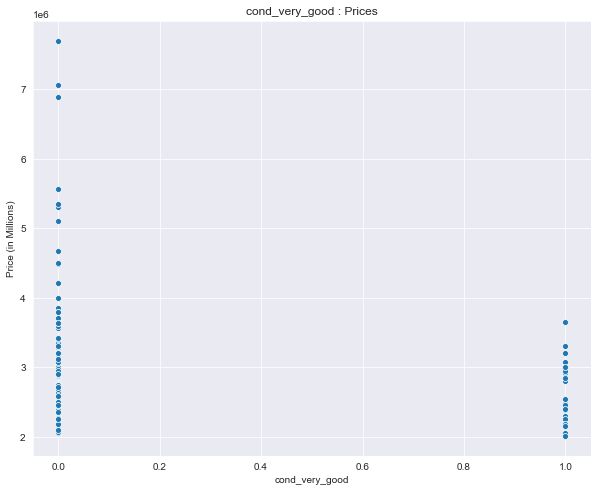

In [7]:
cols = above_2mil.drop('price', axis=1)

for col in cols.columns:
# checking normality of 'price'
    fig = plt.figure(figsize=(10, 8))
    sns.scatterplot(x=cols[col], y=above_2mil['price'])
    plt.title(f'{col} : Prices')
    plt.xlabel(f'{col}')
    plt.ylabel(f'Price (in Millions)')
    plt.show();


The outliers in 'prices' are also outliers in other categories and we've learned that homes above $2 million are not in grades lower than 6, have a poor condition, or are located in Quadrant 2. 

In [8]:
# using z-score to remove outliers
z = np.abs(stats.zscore(df.price))
threshold = 3
df2 = df[(z < threshold)]

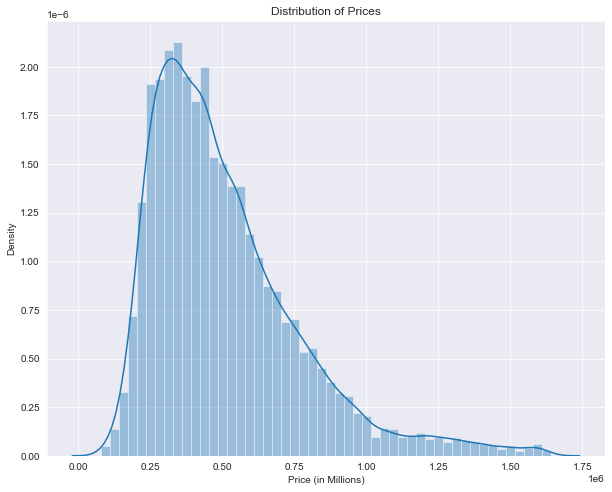

In [9]:
# checking normality of 'price'
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['price'])
plt.title('Distribution of Prices')
plt.xlabel('Price (in Millions)')
plt.ylabel('Density')
plt.show();

Still skewed, but much more normal.

In [10]:
# amount of rows removed
removed = len(df.index) - len(df2.index)
remaining = len(df2.index)
percentage = round(removed/remaining*100, 2)


print(f'Number of rows removed: {removed}')
print(f'Remaining rows: {remaining}')
print(f'Percentage removed: {percentage}%')

Number of rows removed: 404
Remaining rows: 21016
Percentage removed: 1.92%


In [11]:
cols = list(df2.columns)
cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_N',
 'waterfront_Y',
 'not_renovated',
 'is_renovated',
 'floors_1',
 'floors_2',
 'floors_3',
 'floors_3_half',
 'not_viewed',
 'viewed',
 'day_of_year',
 'no_basement',
 'has_basement',
 'total_home_sqft',
 'city',
 'quad_1',
 'quad_2',
 'quad_3',
 'quad_4',
 'grd_1_to_5',
 'grd_6_to_7',
 'grd_8_to_9',
 'grd_10_to_11',
 'grd_12_to_13',
 'jan_mar',
 'apr_jun',
 'jul_sep',
 'oct_dec',
 'cond_poor',
 'cond_fair',
 'cond_average',
 'cond_good',
 'cond_very_good']

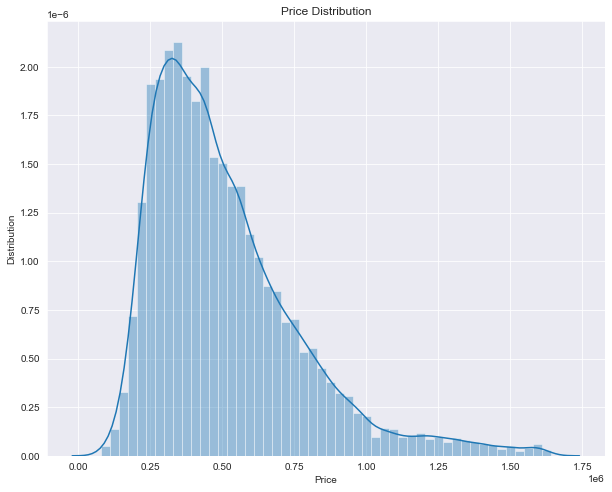

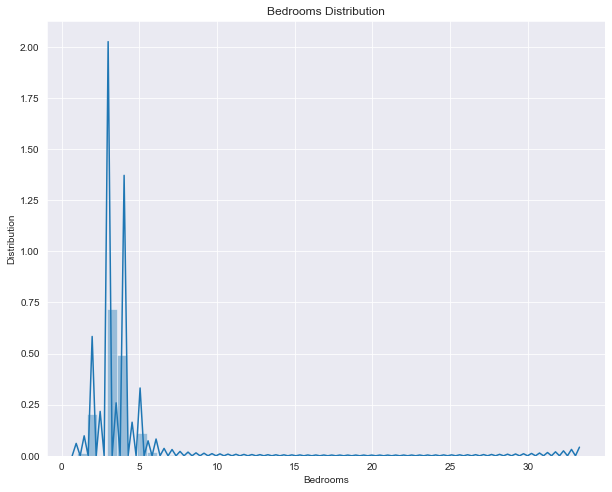

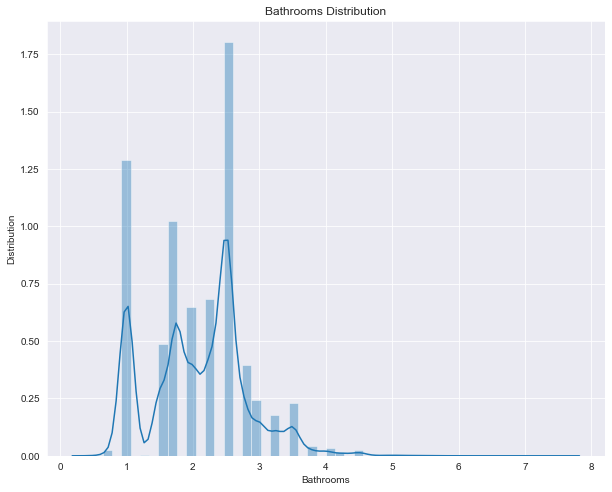

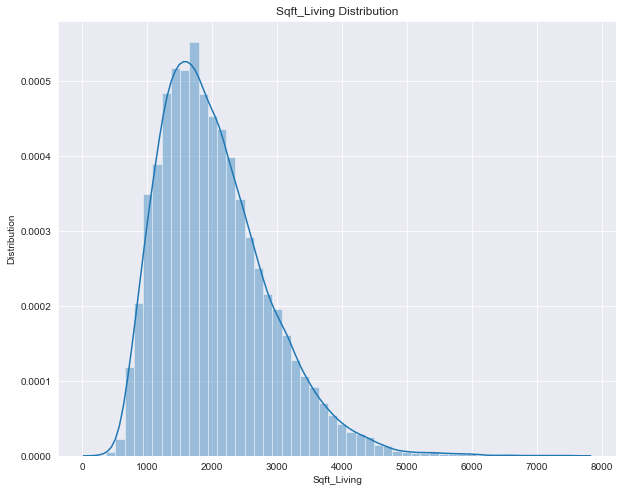

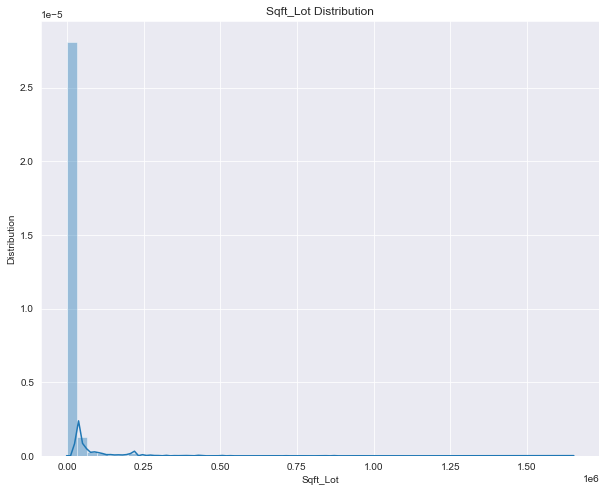

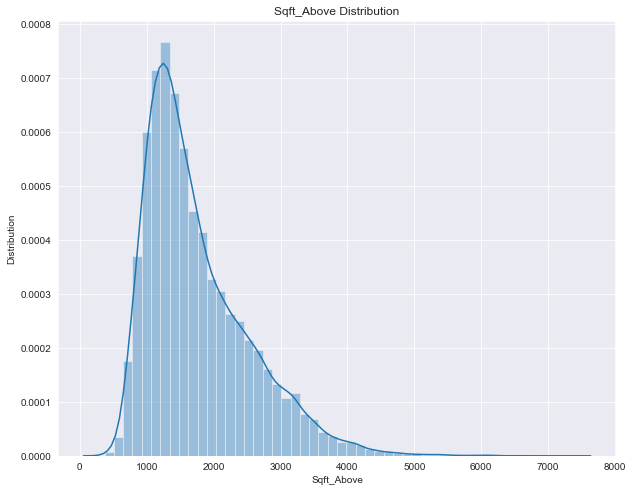

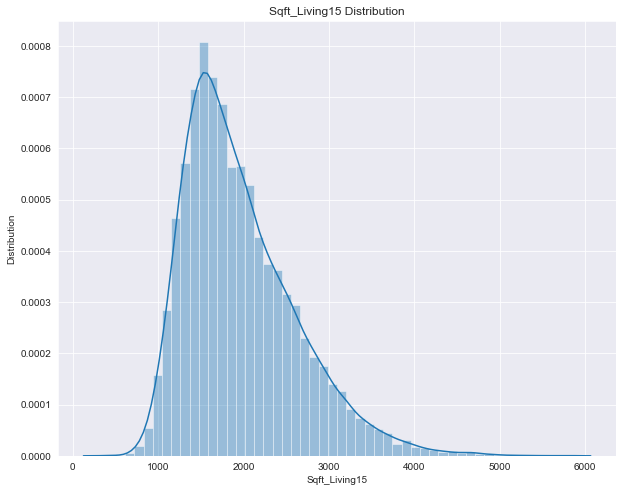

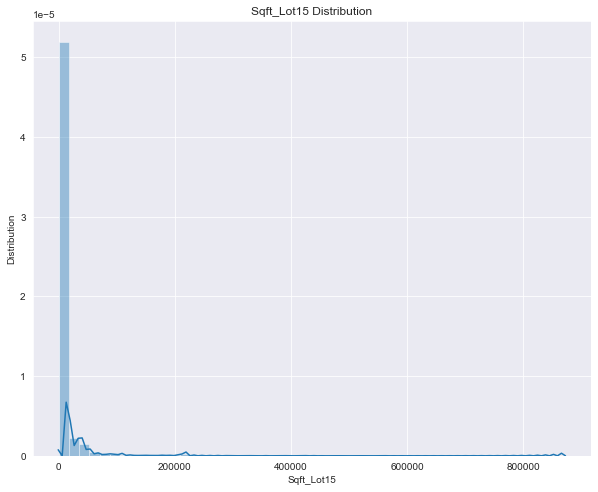

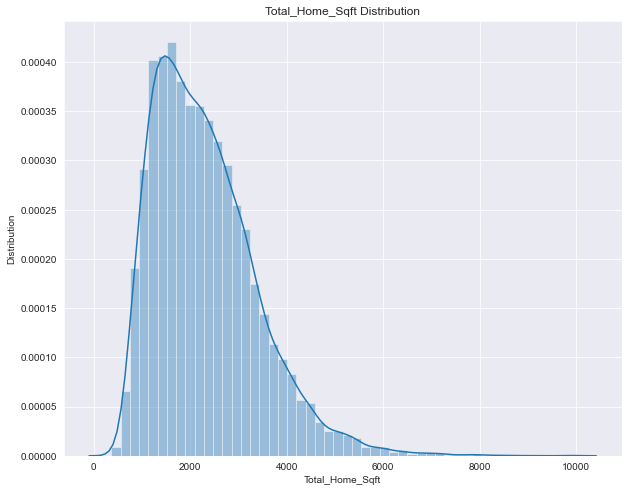

In [12]:
# Continuous variables
conts = ['price','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 
         'sqft_above', 'sqft_living15', 'sqft_lot15', 
         'total_home_sqft']
cont_feats = df2[conts]

for col in cont_feats.columns:
# checking normality of 'price'
    fig = plt.figure(figsize=(10, 8))
    sns.distplot(cont_feats[col])
    plt.title(f'{col.title()} Distribution')
    plt.xlabel(f'{col.title()}')
    plt.ylabel(f'Distribution')
    plt.show();

In [13]:
# Checking Bedrooms
beds = cont_feats[cont_feats['bedrooms'] > 10]
beds

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,total_home_sqft
5368,640000.0,33,1.75,1620,6000,1040,1330,4700,2200.0
20367,520000.0,11,3.00,3000,4960,2400,1420,4960,3600.0


In [14]:
# Probability of a 33 bed, 1.75 bath home is unlikely; removing outliers
z = np.abs(stats.zscore(df2.bedrooms))
threshold = 3
df2 = df2[(z < threshold)]

In [15]:
len(df2.index)

20964

In [16]:
# Bathrooms
bath = df2[df2['bathrooms'] >= 5]
bath



,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
1625,1280000.0,6,5.25,6160,27490,4040,107,37,47.6094,-122.023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2065,740000.0,5,5.00,5774,31675,4490,84,2,47.3466,-122.323,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3232,1180000.0,5,5.00,3960,94089,3960,98,23,47.3800,-122.011,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4514,643500.0,6,5.25,3600,3960,2400,71,56,47.5656,-122.372,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5722,300000.0,6,5.25,2860,5682,2860,78,1,47.3030,-122.221,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5770,343000.0,6,5.00,2732,7655,2732,109,1,47.3045,-122.211,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7115,480000.0,6,5.00,3028,18055,3028,105,18,47.3651,-122.197,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9205,1500000.0,4,5.50,6550,217374,5400,106,32,47.4302,-122.095,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11949,784500.0,4,5.00,5820,13906,3750,93,26,47.3814,-122.164,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12370,1320000.0,4,5.25,6110,10369,6110,105,33,47.5285,-122.135,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


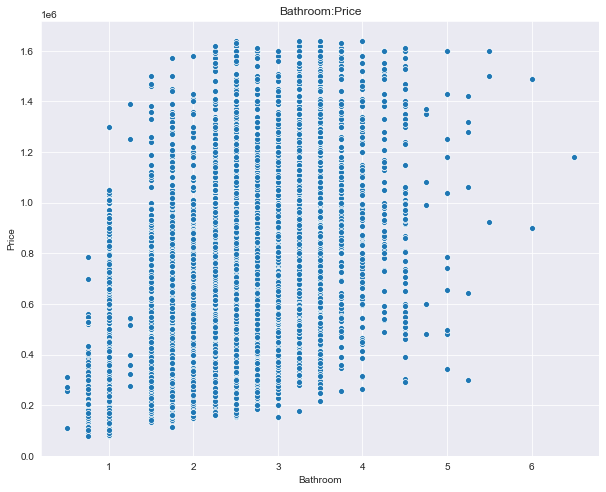

In [17]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x=df2['bathrooms'], y=df2['price'])
plt.title('Bathroom:Price')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show();

In [18]:
df2.bathrooms.unique()

array([1.  , 2.25, 1.75, 1.5 , 2.  , 2.5 , 3.  , 3.75, 2.75, 3.25, 3.5 ,
       0.75, 1.25, 4.5 , 4.25, 4.75, 4.  , 5.25, 5.  , 0.5 , 5.5 , 6.5 ,
       6.  ])

In [19]:
# Checking houses with only a half-bathroom
bath = df2[df2['bathrooms'] == 0.50]
bath

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
4619,255000.0,1,0.5,880,1642,500,10,56,47.5732,-122.372,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6747,312500.0,4,0.5,2300,5570,2300,96,40,47.3285,-122.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15477,109000.0,2,0.5,580,6900,580,41,52,47.5135,-122.262,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19309,273000.0,2,0.5,1180,7750,590,45,62,47.7690,-122.316,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


It doesn't make sense for a 4 bedroom home to not a single full-bath, let alone ANY home not having a full-bathroom. Binning bathrooms.

Text(0, 0.5, 'value counts')

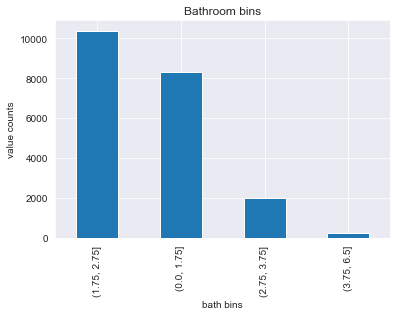

In [20]:
bins = [0, 1.75, 2.75, 3.75, 6.5]
bin_bath = pd.cut(df2['bathrooms'], bins)
bin_bath = bin_bath.cat.as_ordered()

bin_bath.value_counts().plot(kind='bar')
plt.title('Bathroom bins')
plt.xlabel('bath bins')
plt.ylabel('value counts')

In [21]:
# now to afix this to our data frame and create dummies

# Creating dummies
gbin_dummies = pd.get_dummies(bin_bath, prefix='bath') 

# again, keeping first column for now

df2 = pd.concat([df2, gbin_dummies], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 21412
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20964 non-null  float64
 1   bedrooms           20964 non-null  int64  
 2   bathrooms          20964 non-null  float64
 3   sqft_living        20964 non-null  int64  
 4   sqft_lot           20964 non-null  int64  
 5   sqft_above         20964 non-null  int64  
 6   yr_built           20964 non-null  int64  
 7   zipcode            20964 non-null  int64  
 8   lat                20964 non-null  float64
 9   long               20964 non-null  float64
 10  sqft_living15      20964 non-null  int64  
 11  sqft_lot15         20964 non-null  int64  
 12  waterfront_N       20964 non-null  float64
 13  waterfront_Y       20964 non-null  float64
 14  not_renovated      20964 non-null  float64
 15  is_renovated       20964 non-null  float64
 16  floors_1           209

In [22]:
# renaming columns
df2 = df2.rename(columns={'bath_(0.0, 1.75]':'bath_1', 
                          'bath_(1.75, 2.75]':'bath_2', 
                           'bath_(2.75, 3.75]':'bath_3', 
                          'bath_(3.75, 6.5]':'bath_4_up'})
df2 = df2.drop('bathrooms', axis=1)                          
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 21412
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            20964 non-null  float64
 1   bedrooms         20964 non-null  int64  
 2   sqft_living      20964 non-null  int64  
 3   sqft_lot         20964 non-null  int64  
 4   sqft_above       20964 non-null  int64  
 5   yr_built         20964 non-null  int64  
 6   zipcode          20964 non-null  int64  
 7   lat              20964 non-null  float64
 8   long             20964 non-null  float64
 9   sqft_living15    20964 non-null  int64  
 10  sqft_lot15       20964 non-null  int64  
 11  waterfront_N     20964 non-null  float64
 12  waterfront_Y     20964 non-null  float64
 13  not_renovated    20964 non-null  float64
 14  is_renovated     20964 non-null  float64
 15  floors_1         20964 non-null  float64
 16  floors_2         20964 non-null  float64
 17  floors_3    

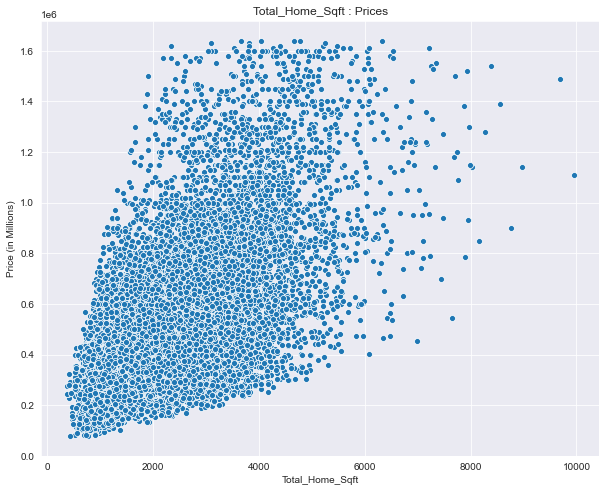

In [23]:
# total_home_sqft
price_scatterplot(df2, x_cols=['total_home_sqft'], y=df2['price'])



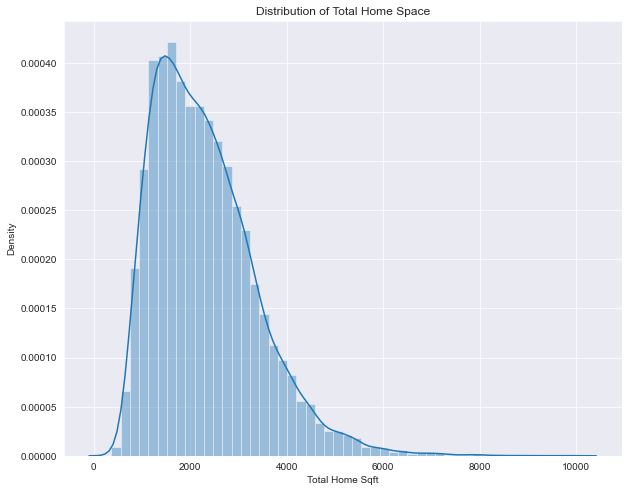

In [24]:
# checking normality of 'total_home_sqft'
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['total_home_sqft'])
plt.title('Distribution of Total Home Space')
plt.xlabel('Total Home Sqft')
plt.ylabel('Density')
plt.show();


Pretty normal distribution. We could get rid of the tail end.

In [25]:
# using z-score to remove outliers
z = np.abs(stats.zscore(df2.total_home_sqft))
threshold = 3
df2 = df2[(z < threshold)]

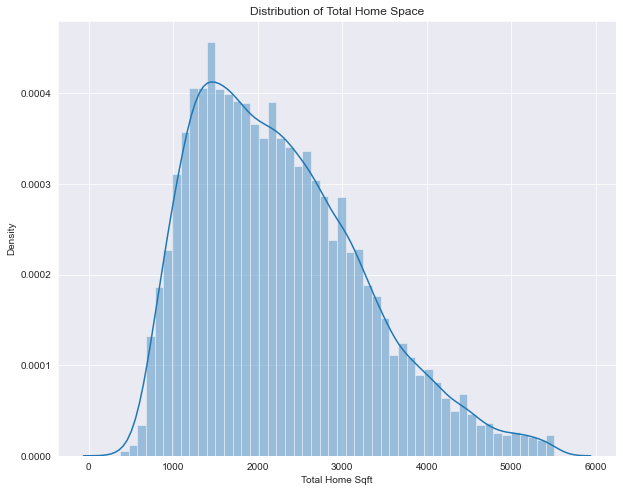

In [26]:
# checking normality of 'total_home_sqft'
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['total_home_sqft'])
plt.title('Distribution of Total Home Space')
plt.xlabel('Total Home Sqft')
plt.ylabel('Density')
plt.show();


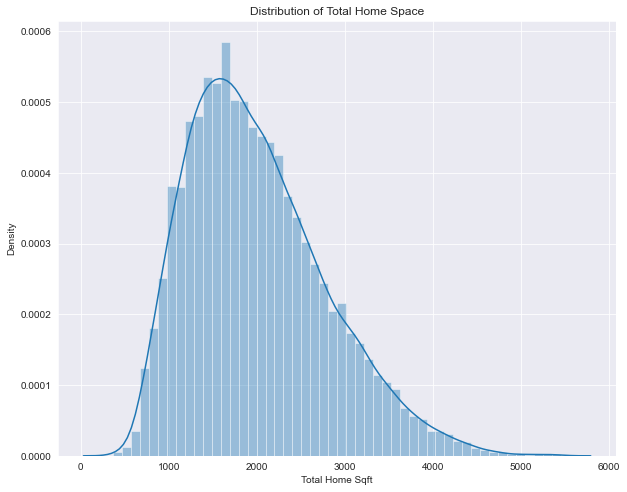

In [27]:
# checking normality of 'total_home_sqft'
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['sqft_living'])
plt.title('Distribution of Total Home Space')
plt.xlabel('Total Home Sqft')
plt.ylabel('Density')
plt.show();


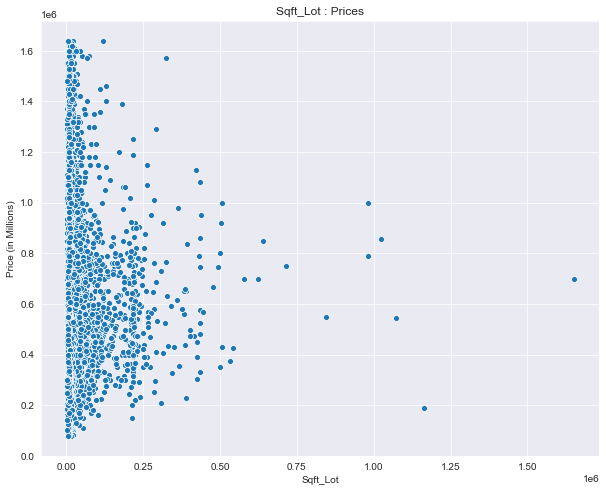

In [28]:
# sqft_lot
price_scatterplot(df2, x_cols=['sqft_lot'], y=df2['price'])

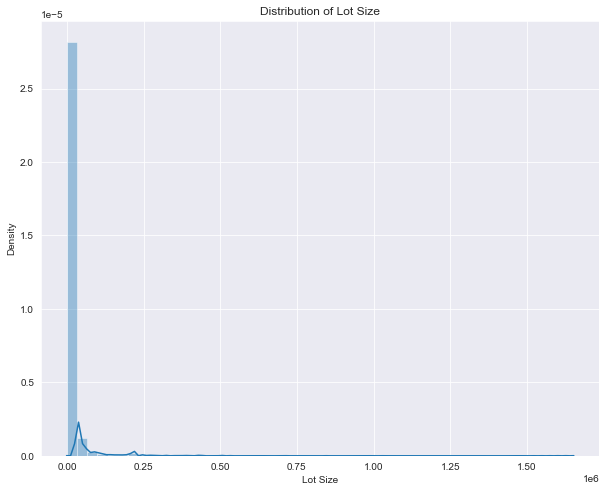

In [29]:
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['sqft_lot'])
plt.title('Distribution of Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Density')
plt.show();

In [30]:
# using z-score to remove outliers
z = np.abs(stats.zscore(df2.sqft_lot))
threshold = 3
df2 = df2[(z < threshold)]

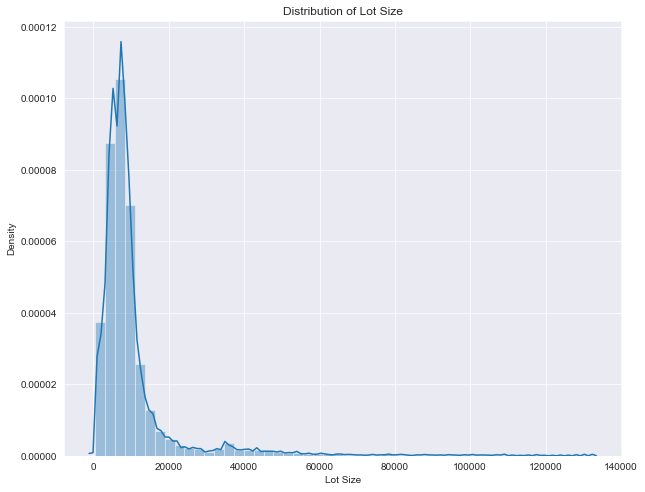

In [31]:
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['sqft_lot'])
plt.title('Distribution of Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Density')
plt.show();

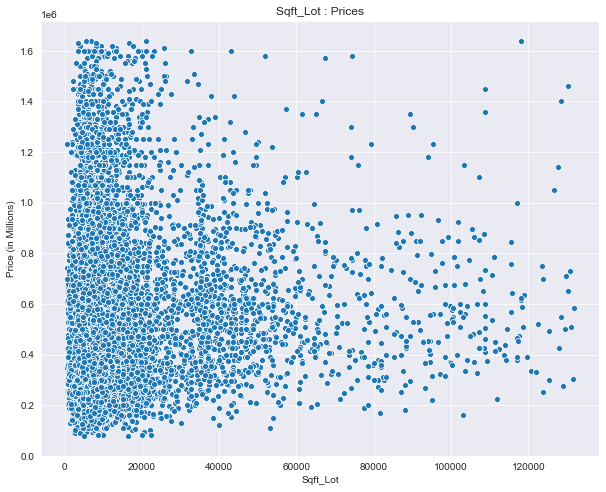

In [32]:
# sqft_lot
price_scatterplot(df2, x_cols=['sqft_lot'], y=df2['price'])

Removed everything outside of 3 standard deviations and still not normalized. Take log of 'sqft_lot'

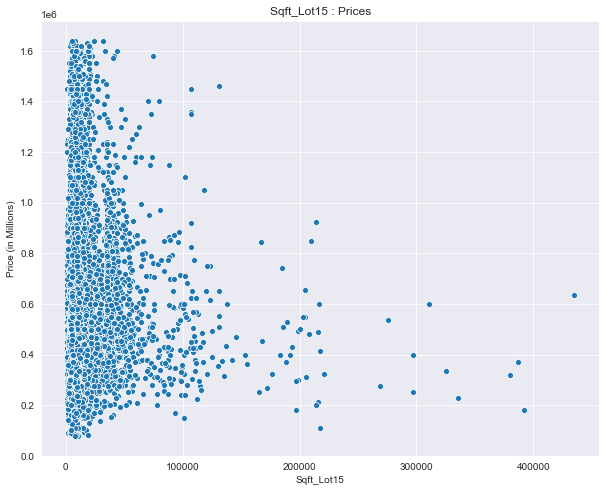

In [33]:
# sqft_lot15
price_scatterplot(df2, x_cols=['sqft_lot15'], y=df2['price'])

In [34]:
# using z-score to remove outliers
def remove_outlier(df, col):
    z = np.abs(stats.zscore(df[col]))
    threshold = 3
    df = df[(z < threshold)]
    return df

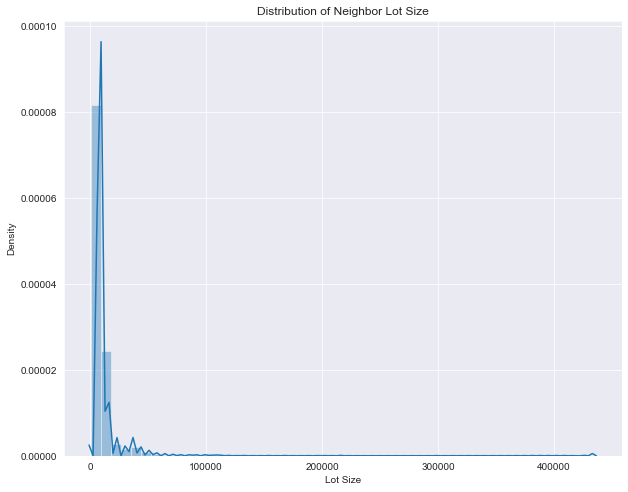

In [35]:
df3 = remove_outlier(df2, 'sqft_lot15')
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['sqft_lot15'])
plt.title('Distribution of Neighbor Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Density')
plt.show();

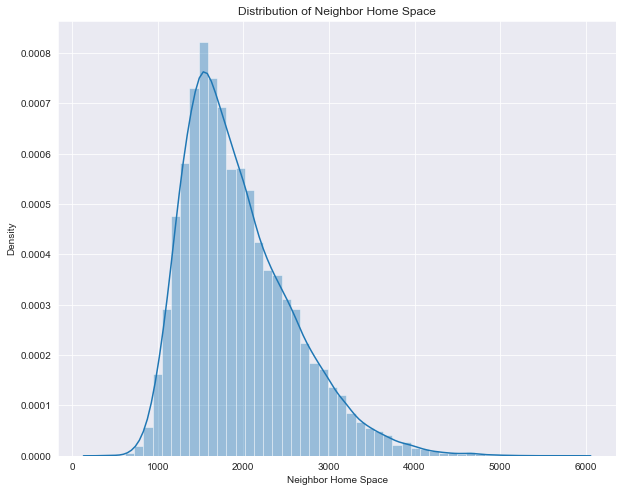

In [36]:
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['sqft_living15'])
plt.title('Distribution of Neighbor Home Space')
plt.xlabel('Neighbor Home Space')
plt.ylabel('Density')
plt.show();

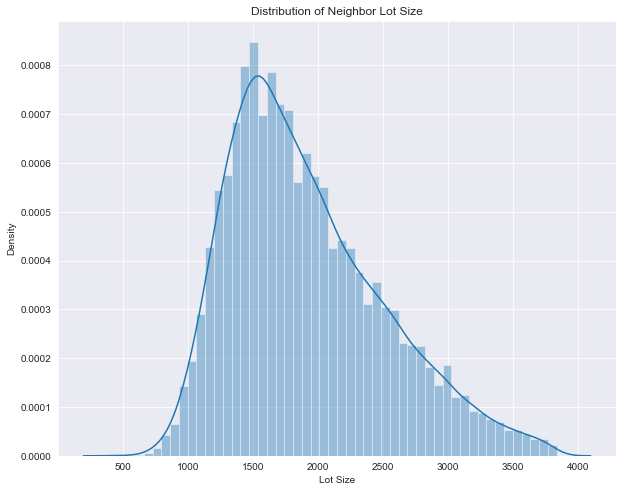

In [37]:
df3 = remove_outlier(df3, 'sqft_living15')
fig = plt.figure(figsize=(10, 8))
sns.distplot(df3['sqft_living15'])
plt.title('Distribution of Neighbor Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Density')
plt.show();

Text(0.5, 1.0, 'Price By City')

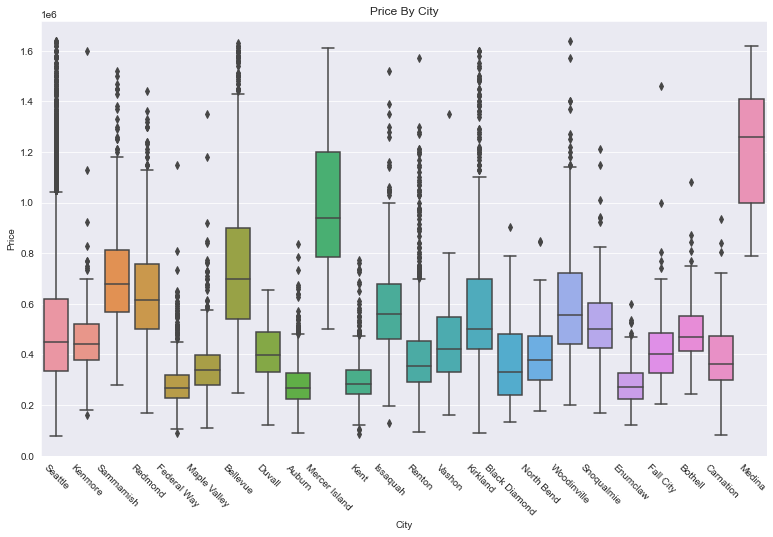

In [38]:
# city
fig = plt.figure(figsize=(13, 8))
sns.boxplot(x=df2['city'], y=df2['price'])
plt.xlabel('City')
plt.xticks(rotation=-45)
plt.ylabel('Price')
plt.title('Price By City')

Mercer Island and Medina are the most expensive by far.

<AxesSubplot:>

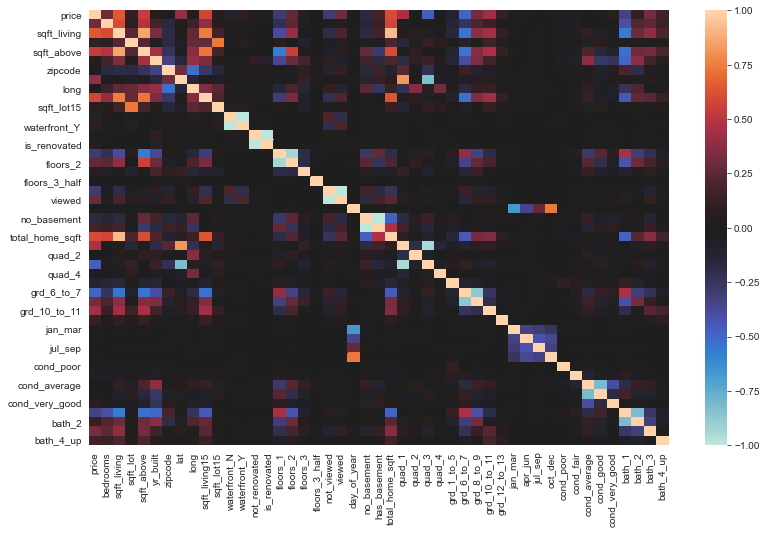

In [39]:
# Checking for multicollinearity
fig = plt.figure(figsize=(13,8))
sns.heatmap(data=df2.corr(), center=0)

In [40]:
# creating a date frame that only contains the pairs of values with highest 
# correlation

# converts all elements to absolute values, stacks into multi-index, resets 
# the index to set the multi-index to seperate columns, and finally sorts them
corr_pairs = df2.corr().abs().stack().reset_index().sort_values(0, 
                                                                ascending=False)
# zipping the variable name columns
corr_pairs['pairs'] = list(zip(corr_pairs.level_0, corr_pairs.level_1))

#set index to the pairs
pairs_index = corr_pairs.set_index(['pairs'])

#dropping level columns
pairs = pairs_index.drop(columns=['level_0', 'level_1'])

#renaming column for comprehension
pairs.columns = ['correlation']
#Since our heatmap shows that our variables only show perfect correlation with 
#themselves, we'll drop duplicates
unique_pairs = pairs.drop_duplicates()

In [41]:
unique_pairs[(unique_pairs.correlation>0.75) & (unique_pairs.correlation<1)]

,correlation
pairs,
"(quad_3, quad_1)",0.938569
"(floors_1, floors_2)",0.931908
"(sqft_living, total_home_sqft)",0.924469
"(grd_8_to_9, grd_6_to_7)",0.872022
"(sqft_living, sqft_above)",0.861207
"(lat, quad_3)",0.826958
"(quad_1, lat)",0.823080
"(bath_2, bath_1)",0.817315
"(cond_good, cond_average)",0.814891


In [42]:
# Removing correlated values
df4 = df3.drop(['quad_3', 'floors_1', 'sqft_living', 'grd_6_to_7',
               'bath_1', 'cond_average'], axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19961 entries, 0 to 21412
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            19961 non-null  float64
 1   bedrooms         19961 non-null  int64  
 2   sqft_lot         19961 non-null  int64  
 3   sqft_above       19961 non-null  int64  
 4   yr_built         19961 non-null  int64  
 5   zipcode          19961 non-null  int64  
 6   lat              19961 non-null  float64
 7   long             19961 non-null  float64
 8   sqft_living15    19961 non-null  int64  
 9   sqft_lot15       19961 non-null  int64  
 10  waterfront_N     19961 non-null  float64
 11  waterfront_Y     19961 non-null  float64
 12  not_renovated    19961 non-null  float64
 13  is_renovated     19961 non-null  float64
 14  floors_2         19961 non-null  float64
 15  floors_3         19961 non-null  float64
 16  floors_3_half    19961 non-null  float64
 17  not_viewed  

In [43]:
# label encode city column
df4['city'] = df4['city'].astype('category')
df4['city'] = df4.city.cat.codes

In [44]:
for col in df4.columns:
    if df4[col].dtype == 'uint8':
        df4[col] = df4[col].astype('int8')

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19961 entries, 0 to 21412
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            19961 non-null  float64
 1   bedrooms         19961 non-null  int64  
 2   sqft_lot         19961 non-null  int64  
 3   sqft_above       19961 non-null  int64  
 4   yr_built         19961 non-null  int64  
 5   zipcode          19961 non-null  int64  
 6   lat              19961 non-null  float64
 7   long             19961 non-null  float64
 8   sqft_living15    19961 non-null  int64  
 9   sqft_lot15       19961 non-null  int64  
 10  waterfront_N     19961 non-null  float64
 11  waterfront_Y     19961 non-null  float64
 12  not_renovated    19961 non-null  float64
 13  is_renovated     19961 non-null  float64
 14  floors_2         19961 non-null  float64
 15  floors_3         19961 non-null  float64
 16  floors_3_half    19961 non-null  float64
 17  not_viewed  

In [45]:
# Building model
target = 'price'
X = df4.drop('price', axis=1).columns
preds = '+'.join(X)

formula = target + '~' + preds

model = smf.ols(formula=formula, data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1319.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:38:25   Log-Likelihood:            -2.6386e+05
No. Observations:               19961   AIC:                         5.278e+05
Df Residuals:                   19924   BIC:                         5.281e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -7.5e+06   4.61e+05    -16.271      0.000    -8.4e+06    -6.6e+06
bedrooms        -1.085e+04   1449.735     -7.485      0.000   -1.37e+04   -8010.323
sqft_lot            0.3046      0.154      1.979      0.048       0.003       0.606
sqft_above         85.6052      3.526     24.277      0.000      78.694      92.517
yr_built        -1447.0515     47.478    -30.479      0.000   -1540.112   -1353.991
zipcode         -1125.1514    100.616    -11.183      0.000   -1322.367    -927.936
lat              1.664e+05   1.34e+04     12.461      0.000     1.4e+05    1.93e+05
long            -1.375e+05    1.1e+04    -12.491      0.000   -1.59e+05   -1.16e+05
sqft_living15      62.0920      2.661     23.336      0.000      56.877      67.307
sqft_lot15         -1.1444      0.223     -5.133      0.000      -1.581      -0.707
waterfront_N    -3.907e+06    2.3e+05    -16.955      0.000   -4.36e+06   -3.46e+06
waterfront_Y    -3.593e+06   2.31e+05    -15.566      0.000   -4.05e+06   -3.14e+06
not_renovated   -3.755e+06    2.3e+05    -16.294      0.000   -4.21e+06    -3.3e+06
is_renovated    -3.744e+06    2.3e+05    -16.248      0.000    -4.2e+06   -3.29e+06
floors_2         1.803e+04   2659.893      6.778      0.000    1.28e+04    2.32e+04
floors_3         5.891e+04   5948.142      9.904      0.000    4.72e+04    7.06e+04
floors_3_half    2.206e+04   5.46e+04      0.404      0.686    -8.5e+04    1.29e+05
not_viewed      -3.795e+06    2.3e+05    -16.472      0.000   -4.25e+06   -3.34e+06
viewed          -3.705e+06   2.31e+05    -16.069      0.000   -4.16e+06   -3.25e+06
day_of_year      -108.1848     36.884     -2.933      0.003    -180.480     -35.889
no_basement     -3.761e+06    2.3e+05    -16.330      0.000   -4.21e+06   -3.31e+06
has_basement    -3.738e+06   2.31e+05    -16.211      0.000   -4.19e+06   -3.29e+06
total_home_sqft    42.2877      2.479     17.057      0.000      37.428      47.147
city              553.6400    271.986      2.036      0.042      20.525    1086.755
quad_1           1.638e+05   4031.417     40.627      0.000    1.56e+05    1.72e+05
quad_2           1.128e+05   8725.670     12.928      0.000    9.57e+04     1.3e+05
quad_4           1.474e+05   1.13e+04     13.066      0.000    1.25e+05     1.7e+05
grd_1_to_5      -4.341e+04   8838.779     -4.911      0.000   -6.07e+04   -2.61e+04
grd_8_to_9       8.125e+04   2648.215     30.679      0.000    7.61e+04    8.64e+04
grd_10_to_11     2.303e+05   5981.952     38.502      0.000    2.19e+05    2.42e+05
grd_12_to_13     3.814e+05   6.02e+04      6.338      0.000    2.63e+05    4.99e+05
jan_mar          -1.88e+06   1.15e+05    -16.296      0.000   -2.11e+06   -1.65e+06
apr_jun         -1.871e+06   1.15e+05    -16.233      0.000    -2.1e+06   -1.65e+06
jul_sep         -1.879e+06   1.15e+05    -16.307      0.000

In [46]:
to_drop= ['price', 'floors_3_half']

# Building model
target = 'price'
X = df4.drop(to_drop, axis=1).columns
preds = '+'.join(X)

formula = target + '~' + preds

model = smf.ols(formula=formula, data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:38:25   Log-Likelihood:            -2.6386e+05
No. Observations:               19961   AIC:                         5.278e+05
Df Residuals:                   19925   BIC:                         5.281e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7.503e+06   4.61e+05    -16.281      0.000   -8.41e+06    -6.6e+06
bedrooms        -1.086e+04   1449.674     -7.488      0.000   -1.37e+04   -8014.193
sqft_lot            0.3047      0.154      1.980      0.048       0.003       0.606
sqft_above         85.6117      3.526     24.279      0.000      78.700      92.523
yr_built        -1446.6375     47.466    -30.478      0.000   -1539.674   -1353.601
zipcode         -1125.5631    100.609    -11.188      0.000   -1322.764    -928.362
lat              1.664e+05   1.34e+04     12.461      0.000     1.4e+05    1.93e+05
long            -1.375e+05    1.1e+04    -12.502      0.000   -1.59e+05   -1.16e+05
sqft_living15      62.0696      2.660     23.333      0.000      56.856      67.284
sqft_lot15         -1.1451      0.223     -5.137      0.000      -1.582      -0.708
waterfront_N    -3.909e+06    2.3e+05    -16.965      0.000   -4.36e+06   -3.46e+06
waterfront_Y    -3.594e+06   2.31e+05    -15.576      0.000   -4.05e+06   -3.14e+06
not_renovated   -3.757e+06    2.3e+05    -16.304      0.000   -4.21e+06   -3.31e+06
is_renovated    -3.746e+06    2.3e+05    -16.257      0.000    -4.2e+06   -3.29e+06
floors_2         1.798e+04   2657.649      6.767      0.000    1.28e+04    2.32e+04
floors_3         5.882e+04   5943.594      9.896      0.000    4.72e+04    7.05e+04
not_viewed      -3.797e+06    2.3e+05    -16.482      0.000   -4.25e+06   -3.35e+06
viewed          -3.706e+06   2.31e+05    -16.079      0.000   -4.16e+06   -3.25e+06
day_of_year      -108.2394     36.883     -2.935      0.003    -180.533     -35.946
no_basement     -3.763e+06    2.3e+05    -16.340      0.000   -4.21e+06   -3.31e+06
has_basement     -3.74e+06   2.31e+05    -16.221      0.000   -4.19e+06   -3.29e+06
total_home_sqft    42.2835      2.479     17.056      0.000      37.424      47.143
city              555.1500    271.955      2.041      0.041      22.096    1088.204
quad_1           1.638e+05   4031.151     40.633      0.000    1.56e+05    1.72e+05
quad_2           1.128e+05   8725.259     12.931      0.000    9.57e+04     1.3e+05
quad_4           1.474e+05   1.13e+04     13.069      0.000    1.25e+05     1.7e+05
grd_1_to_5      -4.341e+04   8838.593     -4.911      0.000   -6.07e+04   -2.61e+04
grd_8_to_9       8.127e+04   2647.323     30.700      0.000    7.61e+04    8.65e+04
grd_10_to_11     2.303e+05   5981.604     38.507      0.000    2.19e+05    2.42e+05
grd_12_to_13     3.814e+05   6.02e+04      6.339      0.000    2.63e+05    4.99e+05
jan_mar         -1.881e+06   1.15e+05    -16.306      0.000   -2.11e+06   -1.65e+06
apr_jun         -1.872e+06   1.15e+05    -16.243      0.000    -2.1e+06   -1.65e+06
jul_sep          -1.88e+06   1.15e+05    -16.317      0.000   -2.11e+06   -1.65e+06
oct_dec          -1.87e+06   1.15e+05    -16.218      0.000

In [47]:
from sklearn.model_selection import train_test_split
y = df4['price']
x_cols = df4.drop(to_drop, axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_cols, y, test_size=0.3, 
                                                    random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#calculating the Mean Squared error
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

# Caluclating Root Mean Squared Error
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE:', round(train_rmse, 2))
print('Test RMSE:', round(test_rmse, 2))

Train Mean Squarred Error: 17686884127.80955
Test Mean Squarred Error: 17969426357.874073
Train RMSE: 132992.05
Test RMSE: 134050.09


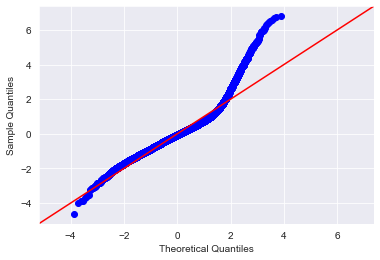

In [49]:
# Checking distribution  of errors using QQ-plot
fig = sm.graphics.qqplot(model.resid, dist='norm', line='45', fit=True)

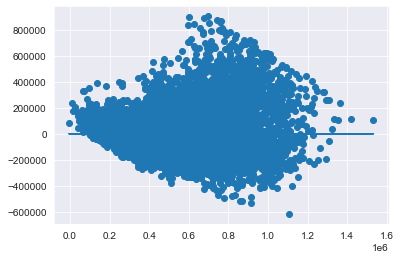

In [50]:
# Checking for homoscedasticity 

X = df4.drop(to_drop, axis=1)

plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df4))])

In [51]:
# cross validating our model for consistency
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

x_cols = df4.drop(to_drop, axis=1)
y = df4['price']

cv_5_results  = np.mean(cross_val_score(linreg, x_cols, y, cv=5,  
                                        scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, x_cols, y, cv=10, 
                                        scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, x_cols, y, cv=20, 
                                        scoring='neg_mean_squared_error'))
cv_40_results = np.mean(cross_val_score(linreg, x_cols, y, cv=40, 
                                        scoring='neg_mean_squared_error'))

In [52]:
print("Mean CV 5 results: ", cv_5_results.mean())
print("Mean CV 10 results: ", cv_10_results.mean())
print("Mean CV 20 results: ", cv_20_results.mean())
print("Mean CV 40 results: ", cv_40_results.mean())
print('Train MSE: ', train_mse)
print('Test MSE: ',test_mse )


Mean CV 5 results:  -19919238310.901924
Mean CV 10 results:  -19421578150.30333
Mean CV 20 results:  -19293584930.867966
Mean CV 40 results:  -19189391611.875977
Train MSE:  17686884127.80955
Test MSE:  17969426357.874073


In [53]:
# for easy reference, we'll calculate our baseline r-squared 

from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=42)
baseline_r_sqr = np.mean(cross_val_score(regression, x_cols, y, scoring='r2', 
                                   cv=crossvalidation))

baseline_r_sqr

0.70222463954798

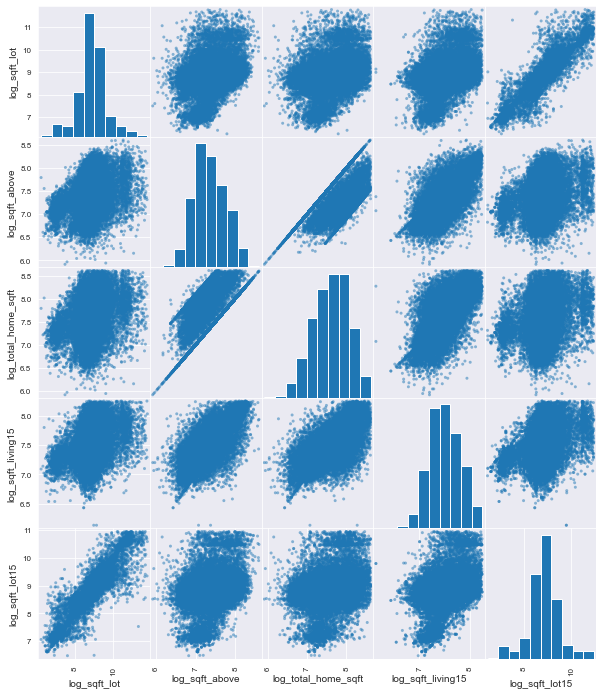

In [54]:
# creating a new data frame for the log transformations
# bedrooms and 
log_df = df4.copy()
log_df = log_df.rename({'sqft_lot': 'log_sqft_lot',
                     'sqft_above':'log_sqft_above',
                     'total_home_sqft':'log_total_home_sqft',
                      'sqft_living15':'log_sqft_living15',
                      'sqft_lot15':'log_sqft_lot15'}, axis=1)

#transforming 
revised_logs = ['log_sqft_lot','log_sqft_above','log_total_home_sqft',
                'log_sqft_living15','log_sqft_lot15']

for log in revised_logs:
    log_df[log] = log_df[log].map(lambda x : np.log(x))
    log_df[log] = log_df[log].rename({log : 'log_'+log})
pd.plotting.scatter_matrix(log_df[revised_logs], figsize=(10,12));

In [55]:
def norm_feat(series):
    """
    Input a series containing continuous variables.
    Outputs a normalized version of the data
    """
    return (series - series.mean())/series.std()

for feat in revised_logs:
    log_df[feat] = norm_feat(log_df[feat])

In [56]:
log_df['price'] = log_df['price'].map(lambda x : np.log(x))

In [57]:
to_drop= ['price', 'floors_3_half']

# Building model
target = 'price'
X = log_df.drop(to_drop, axis=1).columns
preds = '+'.join(X)

formula = target + '~' + preds

log_model = smf.ols(formula=formula, data=log_df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1801.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:38:32   Log-Likelihood:                 981.51
No. Observations:               19961   AIC:                            -1891.
Df Residuals:                   19925   BIC:                            -1607.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.0123      0.795    -11.341      0.000     -10.570      -7.455
bedrooms               -0.0205      0.003     -7.994      0.000      -0.026      -0.015
log_sqft_lot            0.0033      0.004      0.794      0.427      -0.005       0.011
log_sqft_above          0.1177      0.005     23.567      0.000       0.108       0.128
yr_built               -0.0024   8.33e-05    -28.589      0.000      -0.003      -0.002
zipcode                -0.0022      0.000    -12.399      0.000      -0.002      -0.002
lat                     0.4699      0.023     20.219      0.000       0.424       0.515
long                   -0.1650      0.019     -8.657      0.000      -0.202      -0.128
log_sqft_living15       0.0836      0.003     31.200      0.000       0.078       0.089
log_sqft_lot15         -0.0266      0.004     -6.575      0.000      -0.035      -0.019
waterfront_N           -4.7542      0.397    -11.968      0.000      -5.533      -3.976
waterfront_Y           -4.2581      0.398    -10.701      0.000      -5.038      -3.478
not_renovated          -4.5147      0.397    -11.362      0.000      -5.294      -3.736
is_renovated           -4.4976      0.397    -11.320      0.000      -5.276      -3.719
floors_2                0.0216      0.005      4.390      0.000       0.012       0.031
floors_3                0.0590      0.011      5.385      0.000       0.038       0.080
not_viewed             -4.5753      0.397    -11.519      0.000      -5.354      -3.797
viewed                 -4.4370      0.397    -11.163      0.000      -5.216      -3.658
day_of_year            -0.0002   6.38e-05     -3.138      0.002      -0.000   -7.51e-05
no_basement            -4.5290      0.397    -11.405      0.000      -5.307      -3.751
has_basement           -4.4833      0.398    -11.276      0.000      -5.263      -3.704
log_total_home_sqft     0.0795      0.005     15.742      0.000       0.070       0.089
city                    0.0037      0.000      7.937      0.000       0.003       0.005
quad_1                  0.3598      0.007     50.781      0.000       0.346       0.374
quad_2                  0.2520      0.015     16.681      0.000       0.222       0.282
quad_4                  0.3011      0.020     15.438      0.000       0.263       0.339
grd_1_to_5             -0.1479      0.015     -9.572      0.000      -0.178      -0.118
grd_8_to_9              0.1552      0.005     33.804      0.000       0.146       0.164
grd_10_to_11            0.3359      0.010     33.814      0.000       0.316       0.355
grd_12_to_13            0.4865      0.104      4.690      0.000       0.283       0.690
jan_mar                -2.2644      0.199    -11.386      0.000      -2.654      -1.875
apr_jun                -2.2431      0.199    -11.288      0.000      -2.633      -1.854
jul

In [58]:
y = log_df['price']
x_cols = log_df.drop(to_drop, axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_cols, y, test_size=0.3, 
                                                    random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#calculating the Mean Squared error
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

# Caluclating Root Mean Squared Error
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE:', round(train_rmse, 2))
print('Test RMSE:', round(test_rmse, 2))

Train Mean Squarred Error: 0.052577837497115205
Test Mean Squarred Error: 0.054363165432460725
Train RMSE: 0.23
Test RMSE: 0.23


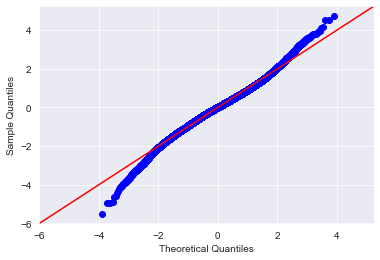

In [59]:
# Checking distribution  of errors using QQ-plot
fig = sm.graphics.qqplot(log_model.resid, dist='norm', line='45', fit=True)

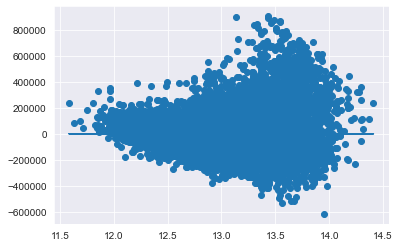

In [60]:
# Checking for homoscedasticity 

X = log_df.drop(to_drop, axis=1)

plt.scatter(log_model.predict(X), model.resid)
plt.plot(log_model.predict(X), [0 for i in range(len(log_df))])

In [61]:
x_cols = log_df.drop(['price'], axis=1)
y = log_df['price']

cv_5_results  = np.mean(cross_val_score(linreg, x_cols, y, cv=5,  
                                        scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, x_cols, y, cv=10, 
                                        scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, x_cols, y, cv=20, 
                                        scoring='neg_mean_squared_error'))

print("Mean CV 5 results: ", cv_5_results.mean())
print("Mean CV 10 results: ", cv_10_results.mean())
print("Mean CV 20 results: ", cv_20_results.mean())
print('Train MSE: ', train_mse)
print('Test MSE: ',test_mse )

Mean CV 5 results:  -0.05908843522946605
Mean CV 10 results:  -0.057794901377890506
Mean CV 20 results:  -0.05751589491249265
Train MSE:  0.052577837497115205
Test MSE:  0.054363165432460725


In [62]:
# inversing the Log transformation on predictions vs. actual to compare RMSE
real_y_hat_test = np.exp(y_hat_test)
real_y_test = np.exp(y_test)

mse_test = np.sum((real_y_test - real_y_hat_test)**2)/len(real_y_test)
round(np.sqrt(mse_test),2)

129961.11

In [63]:
# Check for interactions

from itertools import combinations

features = df4.drop('price', axis=1)

interactions = []

feat_combinations = combinations(features.columns, 2)

data = features.copy()

'''for loop that takes a copy of our data frame, retrieves the columns and 
multiplies them together, evaluates the mean of the cross-validation of the 
model with the interactions present.  If the score is greater than the 
baseline it will be added to the list of interactions, with their score'''

for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', 
                                    cv=crossvalidation))
    if score > baseline_r_sqr:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, 
                                       key=lambda inter: inter[2], 
                                       reverse=True)[:3])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
Top 3 interactions: [('lat', 'long', 0.76), ('sqft_above', 'sqft_living15', 0.759), ('lat', 'sqft_lot15', 0.759)]


<AxesSubplot:>

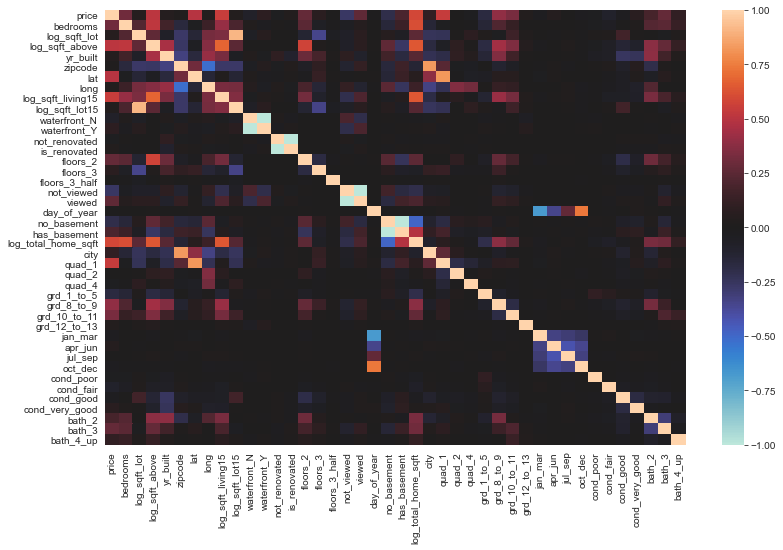

In [64]:
# Checking for multicollinearity
fig = plt.figure(figsize=(13,8))
sns.heatmap(data=log_df.corr(), center=0)